In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, average_precision_score
import seaborn as sns
import joblib
import matplotlib.pyplot as plt

### Loading the Saved Model pickle file

In [2]:
dt_model = joblib.load('decisiontree_model.pkl')

In [3]:
X_test = pd.read_csv('splits/X_test_dataset.csv')

In [4]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,5,95,72,33,0,37.7,0.370,27
1,0,188,82,14,185,32.0,0.682,22
2,9,152,78,34,171,34.2,0.893,33
3,10,129,62,36,0,41.2,0.441,38
4,3,78,70,0,0,32.5,0.270,39
...,...,...,...,...,...,...,...,...
411,1,128,82,17,183,27.5,0.115,22
412,4,94,65,22,0,24.7,0.148,21
413,1,133,102,28,140,32.8,0.234,45
414,3,100,68,23,81,31.6,0.949,28


In [5]:
y_test = pd.read_csv('splits/y_test_dataset.csv')

In [6]:
y_test

,Outcome
0,0
1,1
2,1
3,1
4,0
...,...
411,0
412,0
413,1
414,0


### Testing the Model on Unseen Data

In [7]:
y_test_pred = dt_model.predict(X_test)

In [8]:
y_test_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,

### Visualize Confusion Matrix

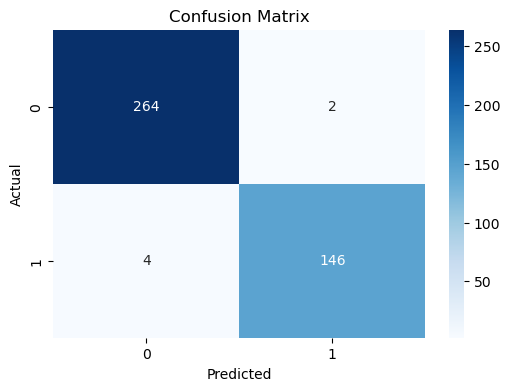

In [9]:
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Evaluate Accuracy, Precision, Recall and F1 Score on test dataset

In [11]:
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print(f"Accuracy: {accuracy:}")
print(f"Precision: {precision:}")
print(f"Recall: {recall:}")
print(f"F1 Score: {f1:}")

Accuracy: 0.9855769230769231
Precision: 0.9864864864864865
Recall: 0.9733333333333334
F1 Score: 0.9798657718120806
